<a href="https://colab.research.google.com/github/MAClaassen/python_course/blob/main/AAC_assignments_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.0.0 Start

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [3]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

data_path='/content/drive/MyDrive/My_project/'

results_path='/content/drive/My Drive/My_project/'

Mounted at /content/drive/


### Load data

In [4]:
# load data
AAC_accidents = pd.read_csv(data_path + '_github-AAC_accidents_tagged_data.csv')
AAC_accidents

,Search Column\n\n,ID,Accident Title,Publication Year,Text,Tags Applied,COUNT OF TAGS,<15,15-20,21-25,...,March,April,May,June,July,August,September,October,November,December
0,0,1,Failure of Rappel Setup (Protection Pulled Out...,1990.0,"Colorado, Rocky Mountain National Park\nOn May...","Serious, Head / Brain Injury, Descent, Roped, ...",8,1.0,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,"Failure of Rappel—Failure to Check System, Bri...",1990.0,"British Columbia, Squamish, Smoke Bluffs\nOn M...","Experienced, Serious, Descent, Roped, Top-Rope...",7,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,"Fall into Crevasse, Climbing Alone, Inadequate...",1990.0,"Alberta, Rocky Mountains, Crowfoot Mountain\nO...","Experienced, Minor, Unroped , Solo, Climbing A...",9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
3,0,4,"Fall into Crevasse, Climbing Unroped, British ...",1990.0,"British Columbia, Bugaboo Mountains, Bugaboo S...","Minor, Unroped , Solo, Alpine/Mountaineering, ...",5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
4,0,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",1990.0,"On the afternoon of March 29, 1989, four ski t...","Deadly, Serious, Descent, Unroped , Solo, Non-...",10,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,0,958a,"Fall on Ice, Inadequate Protection, Poor Posit...",2000.0,"Alberta, Banff National Park, Cascade Waterfal...","No/Little, Deadly, Descent, Unroped , Solo, Ic...",9,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2766,0,958b,"Edited Title: Fall on Ice, Inadequate Protecti...",2000.0,"Alberta, Banff National Park, Cascade Waterfal...","Serious, Descent, Roped, Ice Climbing, Avalanc...",8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2767,0,995a,"Edited title: Snow Blindness ...— Alaska, Moun...",2000.0,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Descent, Alpine/Mountaineering, Ascent Illness...",4,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2768,0,995b,Edited title: Acute Mountain Sickness — Alask...,2000.0,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Serious, Descent, Alpine/Mountaineering, Ascen...",5,NaN,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

# 2. Ensured Date was in DateTime format


AAC_accidents['Publication Year'] = pd.to_datetime(AAC_accidents['Publication Year'], yearfirst=True, format = '%Y')
AAC_accidents['Publication Year'] = pd.DatetimeIndex(AAC_accidents['Publication Year']).year
AAC_accidents['Publication Year'] = AAC_accidents['Publication Year'].fillna(0)
AAC_accidents['Publication Year'] = AAC_accidents['Publication Year'].astype(int)


# 3. Replaced NaN for 0


AAC_accidents= AAC_accidents.fillna(0)


# 4. I wanted to create a new column with the location of the accident. This would involve matching the Text and accident columns to a list containing Canadian Provinces and US States


Provinces_States = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California',
             'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
             'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
             'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
             'Minor Outlying Islands', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
             'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
             'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
             'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands',
             'Utah', 'Vermont', 'Virginia', 'Washington',
             'West Virginia', 'Wisconsin', 'Wyoming','Alberta', 'British Columbia', 'Manitoba','New Brunswick', 'Newfoundland and Labrador',
                 'Northwest Territories', 'Nova Scotia','Nunavut', 'Ontario', 'Prince Edward Island' , 'PEI',
                 'Quebec','Saskatchewan', 'Yukon']

#5. Created a new Location Column
AAC_accidents['Location'] = ''


for i in range(AAC_accidents.shape[0] - 1):
    title = AAC_accidents['Accident Title'].iloc[i]
    text = AAC_accidents['Text'].iloc[i]
    location = None
    for place in Provinces_States:
        if place in title:
            location = place
            break
        elif place in text:
            location = place
            break
    if location == None:
        print(title)

        print()

    AAC_accidents['Location'].iloc[i]=location

AAC_accidents['Location'].isna().sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Avalanche, Fall on Snow and Ice, Pueblo, El Pico de Orizaba

Rappel Error—Misuse of Grigri, Baffin Island, Stewart Valley

Fall on Rock - Lost Balance, Protection Pulled Out 
Crowders Mountain State Park, Two-Pitch Wall

Fall on Rock, Falling Rock - Failure to Test Holds, Inadequate Belay 
Humphrey's Ledge, Tree Keys

Fall On Rock – Inadequate Belay 
Roosevelt National Forest, Dream Canyon

Rockfall – Poor Position 
Canada, Yamnuska, Missionary's Crack

Slip On Rock, Rappel Error – Alcohol, Poor Position 
San Bernadino Mountains, Lucerne Valley

Illness 
Canada, Yokon, Kluane National Park and Reserve, Mt. Logan, East Ridge

Anchor Failure – Off-Route 
Wind River Range, Pingora Peak

Fall on Rock – Incomplete Tie-In Knot 
Canada, Québec, Racine, Lac Larouche

HAPE 
Denali, West Buttress

Fall on Rock, Stranded – Off-Route, Inadequate Gear 
Grand Teton National Park, Teewinot

An Untimely Slip 
New River Gorge, Meadow River

Rappel Error — Damaging Pendulum Swing 
Yosemite Valley, Royal

69

In [6]:
# check what variables are in the data
AAC_accidents.columns

Index(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', '<15', '15-20', '21-25', '26-30',
       '31-35', '36-50', '51-75', '>75', 'No/Little', 'Moderate',
       'Experienced', 'Unknown', 'Deadly', 'Serious', 'Minor',
       'Head / Brain Injury', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'Top-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate

It is clear from the list above that I will need to melt a lot of columns into factors. 

In [7]:
# set row number so I can use it as index later
#AAC_accidents['ID'] = AAC_accidents.reset_index().index

In [8]:
# remove some columns
AAC_accidents = AAC_accidents.drop(columns=['Search Column\n\n', 'Tags Applied', 'COUNT OF TAGS'])

In [ ]:
# look at types of variables
print(AAC_accidents.info())

# Descriptives

## Plotting geo location - total amounts

In [10]:
# load geo data
geo_location = pd.read_csv(data_path + 'geo_location.csv')
geo_location['Location'] = geo_location['name']
AAC_accidents_geo = pd.merge(AAC_accidents, geo_location, how = 'left', on = 'Location')
# add a column of total number of accidents
#AAC_accidents_geo['amount'] = AAC_accidents_geo['Deadly'] + AAC_accidents_geo['Minor'] + AAC_accidents_geo['Serious']
#AAC_accidents_geo

In [ ]:
#AAC_accidents_geo['amount'] = AAC_accidents_geo['Location'].value_counts()
#AAC_accidents_geo

In [11]:
AAC_accidents_geo_select = AAC_accidents_geo[['Location', 'latitude', 'longitude']]
AAC_accidents_geo_select

,Location,latitude,longitude
0,Colorado,39.550051,-105.782067
1,British Columbia,53.726669,-127.647621
2,Alberta,36.855200,-77.893700
3,British Columbia,53.726669,-127.647621
4,Alberta,36.855200,-77.893700
...,...,...,...
2765,Alberta,36.855200,-77.893700
2766,Alberta,36.855200,-77.893700
2767,Alaska,63.588753,-154.493062
2768,Alaska,63.588753,-154.493062


In [ ]:
#AAC_accidents_geo_select['ID'] = AAC_accidents_geo_select.reset_index().index
#AAC_accidents_geo_select = AAC_accidents_geo_select.set_index('ID')
AAC_accidents_geo_select['amount'] = '1'
AAC_accidents_geo_select

In [ ]:
AAC_accidents_geo_amount = AAC_accidents_geo_select.pivot_table(index=['Location', 'latitude', 'longitude'], 
                       values='amount', 
                       aggfunc='count', fill_value=0)
AAC_accidents_geo_amount

In [ ]:
# remove index 
AAC_accidents_geo = AAC_accidents_geo_amount.rename_axis(['Location', 'latitude', 'longitude']).reset_index()
AAC_accidents_geo

In [15]:
fig = go.Figure(data = go.Scattergeo(
        #locationmode = 'USA-states',
        lon = AAC_accidents_geo['longitude'],
        lat = AAC_accidents_geo['latitude'],
        text = AAC_accidents_geo[['Location', 'amount']],
        marker = dict(
            size = AAC_accidents_geo['amount'],
            color = 'blue',
            line_color='white',
            line_width=0.5,
            sizemode = 'area'
        )))

fig.update_layout(
        title_text = 'Number of accidents per location',
        showlegend = False,
        geo = dict(
            scope = 'north america',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

# scope = usa does only US states

## Number of people involved per accident

Most accidents involve 1 person, 884/2770 accidents do not have age info to determine how many people were involved so not super relevant to use. 

In [16]:
# create new var that represents amount of people involved
AAC_accidents['people'] = AAC_accidents['<15'] + AAC_accidents['15-20'] + AAC_accidents['21-25'] + AAC_accidents['26-30'] + AAC_accidents['31-35'] + AAC_accidents['36-50'] + AAC_accidents['51-75'] + AAC_accidents['>75']

AAC_accidents['people'].value_counts()

1.0     1184
0.0      850
2.0      551
3.0      123
4.0       42
5.0        9
7.0        3
11.0       2
6.0        2
25.0       1
8.0        1
12.0       1
9.0        1
Name: people, dtype: int64

In [17]:
# check missing values ones variables are recoded (e.g., seriousness)
#print(AAC_accidents.isnull().sum())
# counts per category in variable
#print(AAC_accidents['Seriousness'].value_counts())

# Recode categorical variables

### Seriousness of accident

In [ ]:
# seriousness of accident
melt_serious = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['Deadly', 'Serious', 'Minor'],
       var_name = 'Seriousness')

melt_serious = melt_serious.loc[(melt_serious['value'] != 0)]

melt_serious = melt_serious.drop('value', 1)

melt_serious

In [149]:
# change factor levels of variable
melt_serious['Seriousness'] = melt_serious['Seriousness'].astype('category')
melt_serious['Seriousness'] = melt_serious['Seriousness'].cat.reorder_categories(['Minor', 'Serious', 'Deadly'])

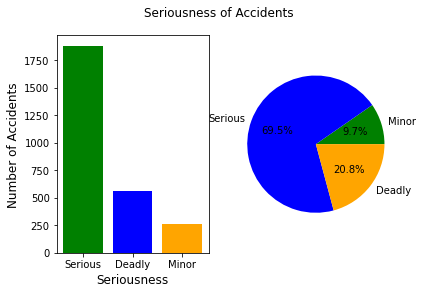

In [157]:
import matplotlib.colors as colors

plt.subplot(121)
plt.suptitle("Seriousness of Accidents")
seriousness_count = melt_serious['Seriousness'].value_counts()
colours = ['green', 'blue', 'orange']

#sns.set(style="darkgrid")
plt.bar(seriousness_count.index, seriousness_count.values, alpha=1, color = colours)
#plt.title('Frequency Distribution of Seriousness of Accidents')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Seriousness', fontsize=12)

plt.subplot(122)
labels = melt_serious['Seriousness'].cat.categories.tolist()
#counts = melt_serious['Seriousness'].value_counts()
sizes = [seriousness_count[var_cat] for var_cat in labels]
plt.pie(sizes, labels = labels, colors = ['orange', 'blue', 'green'], autopct='%1.1f%%')
plt.axis('equal')

plt.show()

In [ ]:
# new way of combining df
#df1 = melt_serious
#df2 = AAC_accidents2
#display('df1', 'df2', "pd.merge(df1, df5)")
#AAC_accidents3 = pd.merge(df1, df2)
#AAC_accidents3

In [ ]:
# attach to df
AAC_serious = melt_serious.merge(AAC_accidents, how = 'right', on = ['ID', 'Accident Title'])
AAC_serious

### Type of climbing

In [ ]:
melt_type = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['Trad Climbing', 'Sport', 'Bouldering', 'Solo'],
       var_name = 'Type_climbing')
melt_type = melt_type.loc[(melt_type['value'] != 0)]
melt_type

In [ ]:
# type of climb: returns 1090 rows because some entries are not coded with type of climbing
melt_type = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['Trad Climbing', 'Sport', 'Bouldering', 'Solo'],
       var_name = 'Type_climbing')

melt_type = melt_type.loc[(melt_type['value'] != 0)]

melt_type = melt_type.drop('value', 1)

melt_type

In [ ]:
# new way of combining df
#df1 = melt_type
#df2 = AAC_accidents
#display('df1', 'df2', "pd.merge(df1, df5)")
#AAC_accidents2 = pd.merge(df1, df2)
#AAC_accidents2

In [ ]:
# attach to df
AAC_serious_type = melt_type.merge(AAC_serious, how = 'right', on = ['ID', 'Accident Title'])
AAC_serious_type

### Experience

In [276]:
# melt experience
melt_experience = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                                     value_vars =   ['No/Little', 'Moderate',
       'Experienced', 'Unknown'],
       var_name = 'Experience')

melt_experience = melt_experience.loc[(melt_experience['value'] != 0)]
melt_experience = melt_experience.drop('value', 1)
melt_experience

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Accident Title,Experience
10,11,"Fall on Rock, Climbing Solo, Inadequate Equipm...",No/Little
11,12,"Fall on Rock, Climbing Solo, No Hard Hat, Inex...",No/Little
13,14,"Fall on Rock, Free-Solo, Exceeding Abilities, ...",No/Little
20,21,"Fall on Snow, Inadequate Protection, No Hard H...",No/Little
26,28,"Falling Rock, Fall on Ice, Faulty Use of Cramp...",No/Little
...,...,...,...
10882,1670t,"Jumped into Crevasse, and then Later Fell in C...",Unknown
10908,1959a,"HAPE and ..., Washington, Mount Rainier, Camp ...",Unknown
10909,1959b,"... HACE, Washington, Mount Rainier, Camp Muir",Unknown
10919,2065a,"Illness ...), Washington, Mount Rainier",Unknown


In [277]:
# change factor levels of variable
melt_experience['Experience'] = melt_experience['Experience'].astype('category')
melt_experience['Experience'] = melt_experience['Experience'].cat.reorder_categories(['No/Little', 'Moderate', 'Experienced', 'Unknown'])

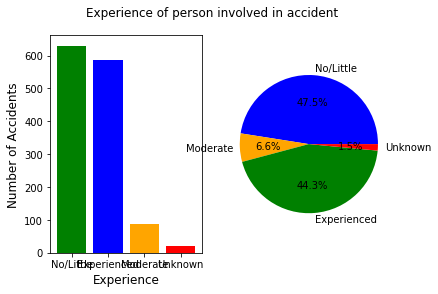

In [278]:
import matplotlib.colors as colors

plt.subplot(121)
plt.suptitle("Experience of person involved in accident")
experience_count = melt_experience['Experience'].value_counts()
colours = ['green', 'blue', 'orange', 'red']

#sns.set(style="darkgrid")
plt.bar(experience_count.index, experience_count.values, alpha=1, color = colours)
#plt.title('Frequency Distribution of Seriousness of Accidents')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Experience', fontsize=12)

plt.subplot(122)
labels = melt_experience['Experience'].astype('category').cat.categories.tolist()
#counts = melt_experience['Experience'].value_counts()
sizes = [experience_count[var_cat] for var_cat in labels]
plt.pie(sizes, labels = labels, colors = ['blue', 'orange', 'green', 'red'], autopct='%1.1f%%')
plt.axis('equal')

plt.show()

In [ ]:
# new way of combining df
#df1 = melt_experience
#df2 = AAC_accidents3
#display('df1', 'df2', "pd.merge(df1, df5)")
#AAC_accidents4 = pd.merge(df1, df2)
#AAC_accidents4

In [281]:
melt_experience['Experience'] = melt_experience['Experience'].cat.remove_categories('Unknown')

In [283]:
# attach to df
AAC_serious_type_experience = melt_experience.merge(AAC_serious_type, how = 'right', on = ['ID', 'Accident Title'])
AAC_serious_type_experience

,ID,Accident Title,Experience,Type_climbing,Seriousness,Publication Year,Text,<15,15-20,21-25,...,May,June,July,August,September,October,November,December,Location,people
0,1,Failure of Rappel Setup (Protection Pulled Out...,NaN,Trad Climbing,Serious,1990,"Colorado, Rocky Mountain National Park\nOn May...",1.0,0.0,0.0,...,1,0,0,0,0,0,0.0,0,Colorado,1.0
1,2,"Failure of Rappel—Failure to Check System, Bri...",Experienced,NaN,Serious,1990,"British Columbia, Squamish, Smoke Bluffs\nOn M...",0.0,0.0,0.0,...,1,0,0,0,0,0,0.0,0,British Columbia,2.0
2,3,"Fall into Crevasse, Climbing Alone, Inadequate...",Experienced,Solo,Minor,1990,"Alberta, Rocky Mountains, Crowfoot Mountain\nO...",0.0,0.0,0.0,...,0,0,0,1,0,0,0.0,0,Alberta,1.0
3,4,"Fall into Crevasse, Climbing Unroped, British ...",NaN,Solo,Minor,1990,"British Columbia, Bugaboo Mountains, Bugaboo S...",0.0,0.0,0.0,...,0,0,0,0,1,0,0.0,0,British Columbia,2.0
4,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",NaN,Solo,Deadly,1990,"On the afternoon of March 29, 1989, four ski t...",0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0,Alberta,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,958a,"Fall on Ice, Inadequate Protection, Poor Posit...",No/Little,Solo,Deadly,2000,"Alberta, Banff National Park, Cascade Waterfal...",0.0,0.0,1.0,...,0,0,0,0,0,0,0.0,1,Alberta,1.0
3031,958b,"Edited Title: Fall on Ice, Inadequate Protecti...",NaN,NaN,Serious,2000,"Alberta, Banff National Park, Cascade Waterfal...",0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,1,Alberta,1.0
3032,995a,"Edited title: Snow Blindness ...— Alaska, Moun...",NaN,NaN,NaN,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...",0.0,0.0,0.0,...,0,1,0,0,0,0,0.0,0,Alaska,0.0
3033,995b,Edited title: Acute Mountain Sickness — Alask...,NaN,NaN,Serious,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...",0.0,0.0,0.0,...,0,1,0,0,0,0,0.0,0,Alaska,0.0


### Age

In [ ]:
# age
melt_age = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['<15', '15-20', '21-25', '26-30', '31-35', '36-50', '51-75', '>75'],
                              var_name = 'Age')

melt_age = melt_age.loc[(melt_age['value'] != 0)]
melt_age = melt_age.drop('value', 1)
melt_age

In [318]:
melt_age['Age'] = melt_age['Age'].astype('category')
melt_age['Age']

count      2413
unique        8
top       36-50
freq        613
Name: Age, dtype: object

In [210]:
# change factor levels of variable
melt_age['Age'] = melt_age['Age'].astype('category')
melt_age['Age'] = melt_age['Age'].cat.reorder_categories(['<15', '15-20', '21-25', '26-30', '31-35', '36-50', '51-75', '>75'])

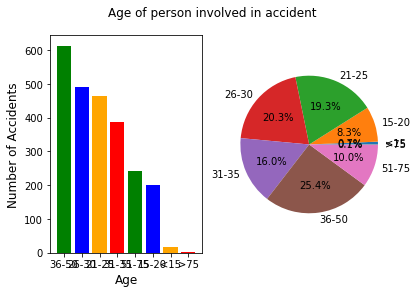

In [211]:
import matplotlib.colors as colors

plt.subplot(121)
plt.suptitle("Age of person involved in accident")
age_count = melt_age['Age'].value_counts()

#colours = ['green', 'blue', 'orange', 'red']

#sns.set(style="darkgrid")
plt.bar(age_count.index, age_count.values, alpha=1, color = colours)
#plt.title('Frequency Distribution of Seriousness of Accidents')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Age', fontsize=12)

plt.subplot(122)
labels = melt_age['Age'].astype('category').cat.categories.tolist()
#counts = melt_experience['Age'].value_counts()
sizes = [age_count[var_cat] for var_cat in labels]
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.axis('equal')

#colors = ['blue', 'orange', 'green', 'red']
plt.show()

In [284]:
# attach to df
AAC_serious_type_experience_age = melt_age.merge(AAC_serious_type_experience, how = 'right', on = ['ID', 'Accident Title'])
AAC_serious_type_experience_age

,ID,Accident Title,Age,Experience,Type_climbing,Seriousness,Publication Year,Text,<15,15-20,...,May,June,July,August,September,October,November,December,Location,people
0,1,Failure of Rappel Setup (Protection Pulled Out...,<15,NaN,Trad Climbing,Serious,1990,"Colorado, Rocky Mountain National Park\nOn May...",1.0,0.0,...,1,0,0,0,0,0,0.0,0,Colorado,1.0
1,2,"Failure of Rappel—Failure to Check System, Bri...",36-50,Experienced,NaN,Serious,1990,"British Columbia, Squamish, Smoke Bluffs\nOn M...",0.0,0.0,...,1,0,0,0,0,0,0.0,0,British Columbia,2.0
2,3,"Fall into Crevasse, Climbing Alone, Inadequate...",51-75,Experienced,Solo,Minor,1990,"Alberta, Rocky Mountains, Crowfoot Mountain\nO...",0.0,0.0,...,0,0,0,1,0,0,0.0,0,Alberta,1.0
3,4,"Fall into Crevasse, Climbing Unroped, British ...",36-50,NaN,Solo,Minor,1990,"British Columbia, Bugaboo Mountains, Bugaboo S...",0.0,0.0,...,0,0,0,0,1,0,0.0,0,British Columbia,2.0
4,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",36-50,NaN,Solo,Deadly,1990,"On the afternoon of March 29, 1989, four ski t...",0.0,0.0,...,0,0,0,0,0,0,0.0,0,Alberta,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,958b,"Edited Title: Fall on Ice, Inadequate Protecti...",31-35,NaN,NaN,Serious,2000,"Alberta, Banff National Park, Cascade Waterfal...",0.0,0.0,...,0,0,0,0,0,0,0.0,1,Alberta,1.0
3695,995a,"Edited title: Snow Blindness ...— Alaska, Moun...",NaN,NaN,NaN,NaN,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...",0.0,0.0,...,0,1,0,0,0,0,0.0,0,Alaska,0.0
3696,995b,Edited title: Acute Mountain Sickness — Alask...,NaN,NaN,NaN,Serious,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...",0.0,0.0,...,0,1,0,0,0,0,0.0,0,Alaska,0.0
3697,997tt,"Stranded — Did Not Check Fixed Ropes, Dehydrat...",21-25,NaN,Trad Climbing,Minor,2000,"California, Yosemite Valley, Lost Arrow Spire\...",0.0,0.0,...,0,0,0,0,0,0,0.0,1,,3.0


## Nature

In [335]:
# nature
melt_nature = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall'],
                              var_name = 'Nature')

melt_nature = melt_nature.loc[(melt_nature['value'] != 0)]
melt_nature = melt_nature.drop('value', 1)
melt_nature

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Accident Title,Nature
43,47,"Weather, Fall on Snow, Exposure, Alaska, Mount...",Visibility
73,83,"Weather, Fatigue, Failure to Follow Route, Fal...",Visibility
79,90,"Fall into Crevasse, Unroped, Alberta, Rocky Mo...",Visibility
109,121,"HAPE, Frostbite, Party Seperated, Inexperience...",Visibility
155,171,"Stranded, Darkness, Falled to Follow Direction...",Visibility
...,...,...,...
10943,2364f,"Fall on Rock – Suspected Rockfall, Climbing Al...",Natural Rockfall
10963,2479b,"Rockfall \nOregon, Mt. Hood, South Side",Natural Rockfall
11003,2649c,"Mt. Shasta rockfall\nCalifornia, Mt. Shasta an...",Natural Rockfall
11009,2682b,"Rocky Mountain National Park, Rockfall \nColor...",Natural Rockfall


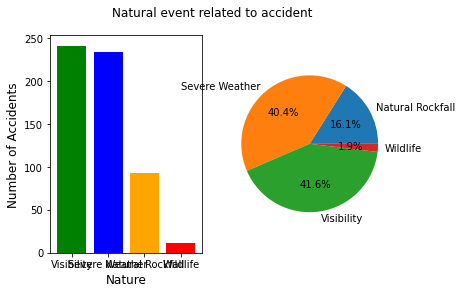

In [336]:
import matplotlib.colors as colors

plt.subplot(121)
plt.suptitle("Natural event related to accident")
nature_count = melt_nature['Nature'].value_counts()

#colours = ['green', 'blue', 'orange', 'red']

#sns.set(style="darkgrid")
plt.bar(nature_count.index, nature_count.values, alpha=1, color = colours)
#plt.title('Frequency Distribution of Seriousness of Accidents')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Nature', fontsize=12)

plt.subplot(122)
labels = melt_nature['Nature'].astype('category').cat.categories.tolist()
#counts = melt_experience['Age'].value_counts()
sizes = [nature_count[var_cat] for var_cat in labels]
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.axis('equal')

#colors = ['blue', 'orange', 'green', 'red']
plt.show()

In [358]:
# attach to df
AAC_serious_type_experience_age_nature = melt_nature.merge(AAC_serious_type_experience_age, how = 'right', on = ['ID', 'Accident Title'])
AAC_serious_type_experience_age_nature

,ID,Accident Title,Nature,Age,Experience,Type_climbing,Seriousness,Publication Year,Text,<15,...,May,June,July,August,September,October,November,December,Location,people
0,1,Failure of Rappel Setup (Protection Pulled Out...,NaN,<15,NaN,Trad Climbing,Serious,1990,"Colorado, Rocky Mountain National Park\nOn May...",1.0,...,1,0,0,0,0,0,0.0,0,Colorado,1.0
1,2,"Failure of Rappel—Failure to Check System, Bri...",NaN,36-50,Experienced,NaN,Serious,1990,"British Columbia, Squamish, Smoke Bluffs\nOn M...",0.0,...,1,0,0,0,0,0,0.0,0,British Columbia,2.0
2,3,"Fall into Crevasse, Climbing Alone, Inadequate...",NaN,51-75,Experienced,Solo,Minor,1990,"Alberta, Rocky Mountains, Crowfoot Mountain\nO...",0.0,...,0,0,0,1,0,0,0.0,0,Alberta,1.0
3,4,"Fall into Crevasse, Climbing Unroped, British ...",NaN,36-50,NaN,Solo,Minor,1990,"British Columbia, Bugaboo Mountains, Bugaboo S...",0.0,...,0,0,0,0,1,0,0.0,0,British Columbia,2.0
4,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",NaN,36-50,NaN,Solo,Deadly,1990,"On the afternoon of March 29, 1989, four ski t...",0.0,...,0,0,0,0,0,0,0.0,0,Alberta,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,958b,"Edited Title: Fall on Ice, Inadequate Protecti...",NaN,31-35,NaN,NaN,Serious,2000,"Alberta, Banff National Park, Cascade Waterfal...",0.0,...,0,0,0,0,0,0,0.0,1,Alberta,1.0
3855,995a,"Edited title: Snow Blindness ...— Alaska, Moun...",NaN,NaN,NaN,NaN,NaN,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...",0.0,...,0,1,0,0,0,0,0.0,0,Alaska,0.0
3856,995b,Edited title: Acute Mountain Sickness — Alask...,NaN,NaN,NaN,NaN,Serious,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...",0.0,...,0,1,0,0,0,0,0.0,0,Alaska,0.0
3857,997tt,"Stranded — Did Not Check Fixed Ropes, Dehydrat...",Severe Weather,21-25,NaN,Trad Climbing,Minor,2000,"California, Yosemite Valley, Lost Arrow Spire\...",0.0,...,0,0,0,0,0,0,0.0,1,,3.0


## Human causes

In [338]:
#causes
melt_causes = AAC_accidents.melt(id_vars=['ID', 'Accident Title'],
                              value_vars=['Non-Ascent Illness', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication'],
                              var_name = 'Causes')

melt_causes = melt_causes.loc[(melt_causes['value'] != 0)]
melt_causes = melt_causes.drop('value', 1)
melt_causes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Accident Title,Causes
164,183,"Failure to Communicate, Illness, Alaska, Mount...",Non-Ascent Illness
443,488,"Grand Mal Seizures, Alaska, Mount McKinley",Non-Ascent Illness
512,564,"Acute Abdomen, Alaska, Mount McKinley, West Bu...",Non-Ascent Illness
513,565,"Atrial Fibrillation, Alaska, Mount McKinley, W...",Non-Ascent Illness
618,680,"Appendicitis, Alaska, Mount McKinley, Muldrow ...",Non-Ascent Illness
...,...,...,...
82881,1481t,"Fall on Rock—Lowering Error, Communication Pro...",Miscommunication
82898,1604t,"Fall on Rock—Dislocated Knee, Fall on Snow—Una...",Miscommunication
82925,189t,"Fall on Rock while Rappelling, Miscommunicatio...",Miscommunication
82954,2247t,"Fall on Rock, Lowering Error \nMaine, Acadia N...",Miscommunication


In [339]:
# percentage per cause?
#melt_causes['Causes'].describe() does not work

KeyError: ignored

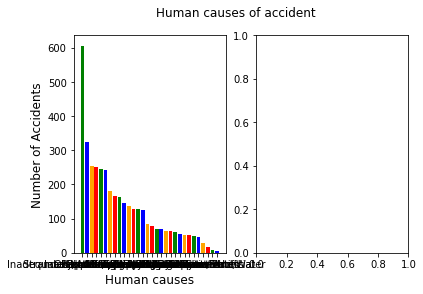

In [341]:
import matplotlib.colors as colors

plt.subplot(121)
plt.suptitle("Human causes of accident")
causes_count = melt_causes['Causes'].value_counts()

#colours = ['green', 'blue', 'orange', 'red']

#sns.set(style="darkgrid")
plt.bar(causes_count.index, causes_count.values, alpha=1, color = colours)
#plt.title('Frequency Distribution of Seriousness of Accidents')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Human causes', fontsize=12)

plt.subplot(122)
labels = causes_count['Causes'].astype('category').cat.categories.tolist()
#counts = melt_experience['Age'].value_counts()
sizes = [causes_count[var_cat] for var_cat in labels]
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.axis('equal')

#colors = ['blue', 'orange', 'green', 'red']
plt.show()

In [359]:
# attach to df
AAC_serious_type_experience_age_nature_causes = melt_causes.merge(AAC_serious_type_experience_age_nature, how = 'right', on = ['ID', 'Accident Title'])
AAC_serious_type_experience_age_nature_causes

,ID,Accident Title,Causes,Nature,Age,Experience,Type_climbing,Seriousness,Publication Year,Text,...,May,June,July,August,September,October,November,December,Location,people
0,1,Failure of Rappel Setup (Protection Pulled Out...,Inadequate Equipment,NaN,<15,NaN,Trad Climbing,Serious,1990,"Colorado, Rocky Mountain National Park\nOn May...",...,1,0,0,0,0,0,0.0,0,Colorado,1.0
1,1,Failure of Rappel Setup (Protection Pulled Out...,Inadequate Protection / Pulled,NaN,<15,NaN,Trad Climbing,Serious,1990,"Colorado, Rocky Mountain National Park\nOn May...",...,1,0,0,0,0,0,0.0,0,Colorado,1.0
2,1,Failure of Rappel Setup (Protection Pulled Out...,Rappel Error,NaN,<15,NaN,Trad Climbing,Serious,1990,"Colorado, Rocky Mountain National Park\nOn May...",...,1,0,0,0,0,0,0.0,0,Colorado,1.0
3,2,"Failure of Rappel—Failure to Check System, Bri...",Knot & Tie-in Error,NaN,36-50,Experienced,NaN,Serious,1990,"British Columbia, Squamish, Smoke Bluffs\nOn M...",...,1,0,0,0,0,0,0.0,0,British Columbia,2.0
4,2,"Failure of Rappel—Failure to Check System, Bri...",Rappel Error,NaN,36-50,Experienced,NaN,Serious,1990,"British Columbia, Squamish, Smoke Bluffs\nOn M...",...,1,0,0,0,0,0,0.0,0,British Columbia,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6762,995b,Edited title: Acute Mountain Sickness — Alask...,Non-Ascent Illness,NaN,NaN,NaN,NaN,Serious,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...",...,0,1,0,0,0,0,0.0,0,Alaska,0.0
6763,997tt,"Stranded — Did Not Check Fixed Ropes, Dehydrat...",Fatigue,Severe Weather,21-25,NaN,Trad Climbing,Minor,2000,"California, Yosemite Valley, Lost Arrow Spire\...",...,0,0,0,0,0,0,0.0,1,,3.0
6764,997tt,"Stranded — Did Not Check Fixed Ropes, Dehydrat...",Stranded / Lost / Overdue,Severe Weather,21-25,NaN,Trad Climbing,Minor,2000,"California, Yosemite Valley, Lost Arrow Spire\...",...,0,0,0,0,0,0,0.0,1,,3.0
6765,997tt,"Stranded — Did Not Check Fixed Ropes, Dehydrat...",Fatigue,Severe Weather,26-30,NaN,Trad Climbing,Minor,2000,"California, Yosemite Valley, Lost Arrow Spire\...",...,0,0,0,0,0,0,0.0,1,,3.0


### Causes merged to seriousness

In [ ]:
# attach to df
AAC_serious_cause = melt_causes.merge(AAC_serious, how = 'right', on = ['ID', 'Accident Title'])
AAC_serious_cause

# Crosstabs

In [36]:
import pandas as pd
import seaborn as sns

## Seriousness by type of climbing

In [199]:
pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Type_climbing, margins=True, margins_name="Total", 
            rownames = ["Seriousness of Accident"], colnames = ["Type of Climbing"])

Type of Climbing,Bouldering,Solo,Sport,Trad Climbing,Total
Seriousness of Accident,,,,,
Minor,0,40,17,140,197
Serious,16,321,142,837,1316
Deadly,0,242,17,176,435
Total,16,603,176,1153,1948


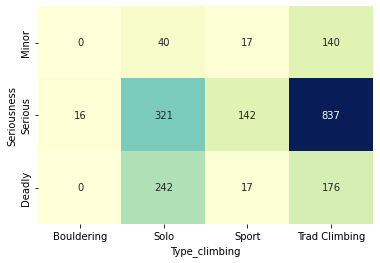

In [200]:
# heatmap of crosstab
sns.heatmap(pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Type_climbing),
            cmap="YlGnBu", annot=True, fmt = ".3g", cbar=False)

In [74]:
#import sys
#!{sys.executable} -m pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
#pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
#pip install --user scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
#import scipy

In [88]:
#pip install scipy.stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats


In [96]:
from scipy import stats

In [201]:
contingency = pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Type_climbing)
# Chi-square test of independence. 
chi2, p, dof, expected = stats.chi2_contingency(contingency) 
# Print the p-value
print(p)

3.08143804250749e-34


## Seriouness by experience

In [241]:
pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Experience, margins=True, margins_name="Total", 
            rownames = ["Seriousness of Accident"], colnames = ["Experience"])

Experience,No/Little,Moderate,Experienced,Total
Seriousness of Accident,,,,
Minor,127,20,72,219
Serious,535,89,477,1101
Deadly,154,44,253,451
Total,816,153,802,1771


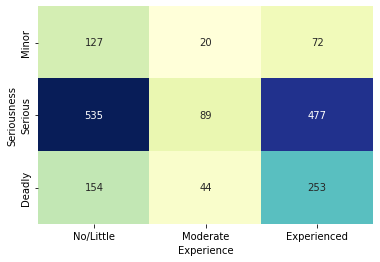

In [285]:
# heatmap of crosstab
sns.heatmap(pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Experience),
            cmap="YlGnBu", annot=True, fmt = ".3g", cbar=False)

In [205]:
contingency = pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Experience)
# Chi-square test of independence. 
chi2, p, dof, expected = stats.chi2_contingency(contingency) 
# Print the p-value
print(p)

8.87620752756336e-09


## Seriousness by age

In [213]:
pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Age, margins=True, margins_name="Total", 
            rownames = ["Seriousness of Accident"], colnames = ["Age"])

Age,<15,15-20,21-25,26-30,31-35,36-50,51-75,>75,Total
Seriousness of Accident,,,,,,,,,
Minor,2,36,62,55,36,59,22,0,272
Serious,16,137,331,355,282,431,156,0,1708
Deadly,3,53,100,121,110,168,85,2,642
Total,21,226,493,531,428,658,263,2,2622


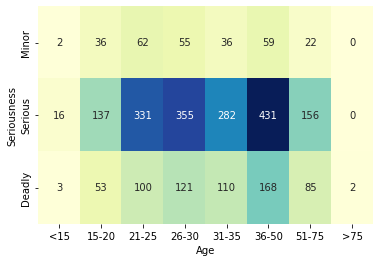

In [214]:
# heatmap of crosstab
sns.heatmap(pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Age),
            cmap="YlGnBu", annot=True, fmt = ".3g", cbar=False)

In [215]:
contingency = pd.crosstab(AAC_serious_type_experience_age.Seriousness, AAC_serious_type_experience_age.Age)
# Chi-square test of independence. 
chi2, p, dof, expected = stats.chi2_contingency(contingency) 
# Print the p-value
print(p)

0.0017661603443864722


# MCA

In [ ]:
# there's a lot of duplicate accidents in our new dataframe 
#ids = AAC_accidents5["ID"]

#AAC_accidents5[ids.isin(ids[ids.duplicated()])].sort_values("ID")

In [287]:
# select columns
MCA_main_cat = AAC_serious_type_experience_age[["Experience", "Type_climbing", "Seriousness", "Age"]]

In [289]:
# frop NA because MCA does not take NA: only 867 accidents left
MCA_main_cat = MCA_main_cat.dropna()
MCA_main_cat

,Experience,Type_climbing,Seriousness,Age
2,Experienced,Solo,Minor,51-75
12,No/Little,Solo,Serious,15-20
13,No/Little,Solo,Serious,21-25
14,No/Little,Solo,Serious,36-50
15,No/Little,Solo,Deadly,21-25
...,...,...,...,...
3664,No/Little,Solo,Serious,21-25
3680,Experienced,Solo,Deadly,36-50
3681,No/Little,Solo,Deadly,26-30
3684,No/Little,Solo,Deadly,21-25


In [226]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [227]:
import prince

In [294]:
mca = prince.MCA()

In [295]:
mca = mca.fit(MCA_main_cat)
mca = mca.transform(MCA_main_cat) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)


             0         1
2     0.695329  0.401452
12   -0.305652  0.441259
13   -0.121239  0.629471
14    0.212383 -0.025075
15    0.437445  1.112609
...        ...       ...
3664 -0.121239  0.629471
3680  1.212263  0.086881
3681  0.524001  0.719436
3684  0.437445  1.112609
3693  0.437445  1.112609

[867 rows x 2 columns]


In [296]:
mca = prince.MCA()
mca = mca.fit(MCA_main_cat)

Is everything squished because there's a lot of overlap in the points?

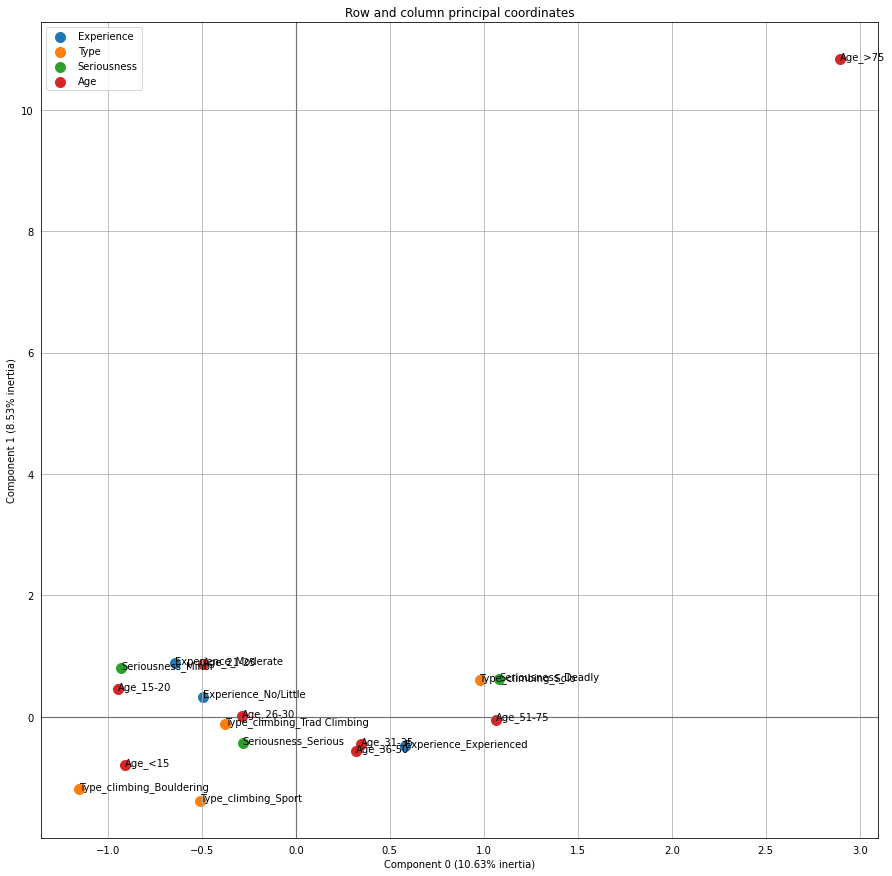

In [300]:
ax = mca.plot_coordinates(
     X=MCA_main_cat,
     ax=None,
     figsize=(15, 15),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=100,
     show_column_labels=True,
     legend_n_cols=1
     )

## MCA causes and seriousness

In [369]:
# select columns
MCA_causes = AAC_serious_cause[["Seriousness", "Causes"]]

In [371]:
# drop NA because MCA does not take NA
MCA_causes = MCA_causes.dropna()
MCA_causes

,Seriousness,Causes
0,Serious,Inadequate Equipment
1,Serious,Inadequate Protection / Pulled
2,Serious,Rappel Error
3,Serious,Knot & Tie-in Error
4,Serious,Rappel Error
...,...,...
4816,Serious,Crowds
4817,Serious,Inadequate Protection / Pulled
4819,Serious,Non-Ascent Illness
4820,Minor,Fatigue


In [372]:
mca = prince.MCA()

In [373]:
mca = mca.fit(MCA_causes)
mca = mca.transform(MCA_causes) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)


             0         1
0     0.035241  0.154704
1    -0.788717 -0.357303
2     0.047316  0.405298
3    -0.406802  0.880428
4     0.047316  0.405298
...        ...       ...
4816 -0.379105 -0.532266
4817 -0.788717 -0.357303
4819 -0.701394 -0.021388
4820  1.320663 -0.573564
4821  2.507193 -1.086011

[3770 rows x 2 columns]


In [374]:
mca = prince.MCA()
mca = mca.fit(MCA_causes)

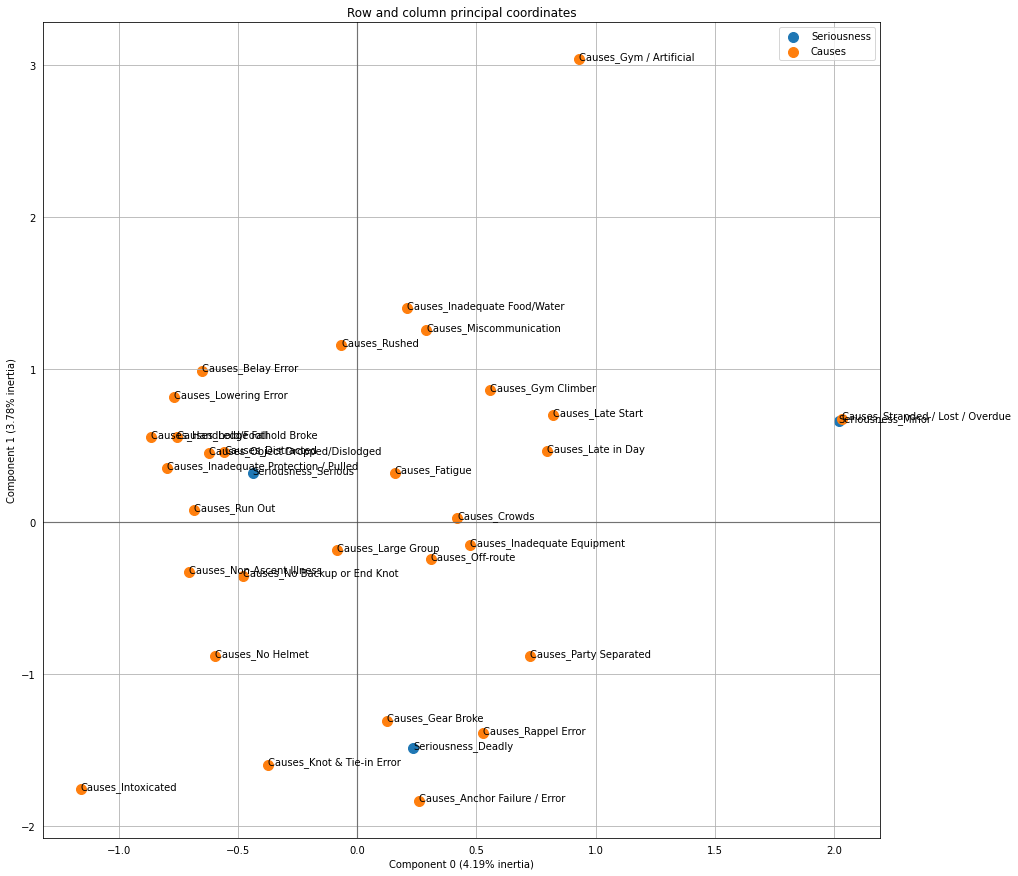

In [375]:
ax = mca.plot_coordinates(
     X=MCA_causes,
     ax=None,
     figsize=(15, 15),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=100,
     show_column_labels=True,
     legend_n_cols=1
     )

In [350]:
mca.explained_inertia_

[0.04191101249996564, 0.03800228133146869]

## MCA causes, seriousness, type of climbing, experience, age

In [385]:
# select columns to be included in MCA
MCA_causes = AAC_serious_type_experience_age_nature_causes[['Seriousness', 'Type_climbing', 'Experience', 'Age', 'Causes']]

In [386]:
# drop NA because MCA does not take NA: only 1675 accidents left
MCA_causes = MCA_causes.dropna()
MCA_causes

,Seriousness,Type_climbing,Experience,Age,Causes
5,Minor,Solo,Experienced,51-75,Inadequate Equipment
16,Serious,Solo,No/Little,15-20,Inadequate Equipment
17,Serious,Solo,No/Little,21-25,Inadequate Equipment
18,Serious,Solo,No/Little,36-50,Inadequate Equipment
19,Deadly,Solo,No/Little,21-25,No Helmet
...,...,...,...,...,...
6743,Deadly,Solo,No/Little,26-30,Off-route
6744,Deadly,Solo,No/Little,26-30,Inadequate Equipment
6748,Deadly,Solo,No/Little,21-25,Inadequate Equipment
6757,Deadly,Solo,No/Little,21-25,Large Group


In [387]:
mca = prince.MCA()

In [388]:
mca = mca.fit(MCA_causes)
mca = mca.transform(MCA_causes) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)


             0         1
5     0.824811  0.419201
16    0.735063  0.078711
17    0.928805  0.291842
18    0.660354  0.526637
19    0.858654  0.714270
...        ...       ...
6743  0.906559  0.933368
6744  1.074512  0.813170
6748  1.252735  0.620681
6757  0.873647  0.803327
6758  0.701212  0.512279

[1675 rows x 2 columns]


In [389]:
mca = prince.MCA()
mca = mca.fit(MCA_causes)

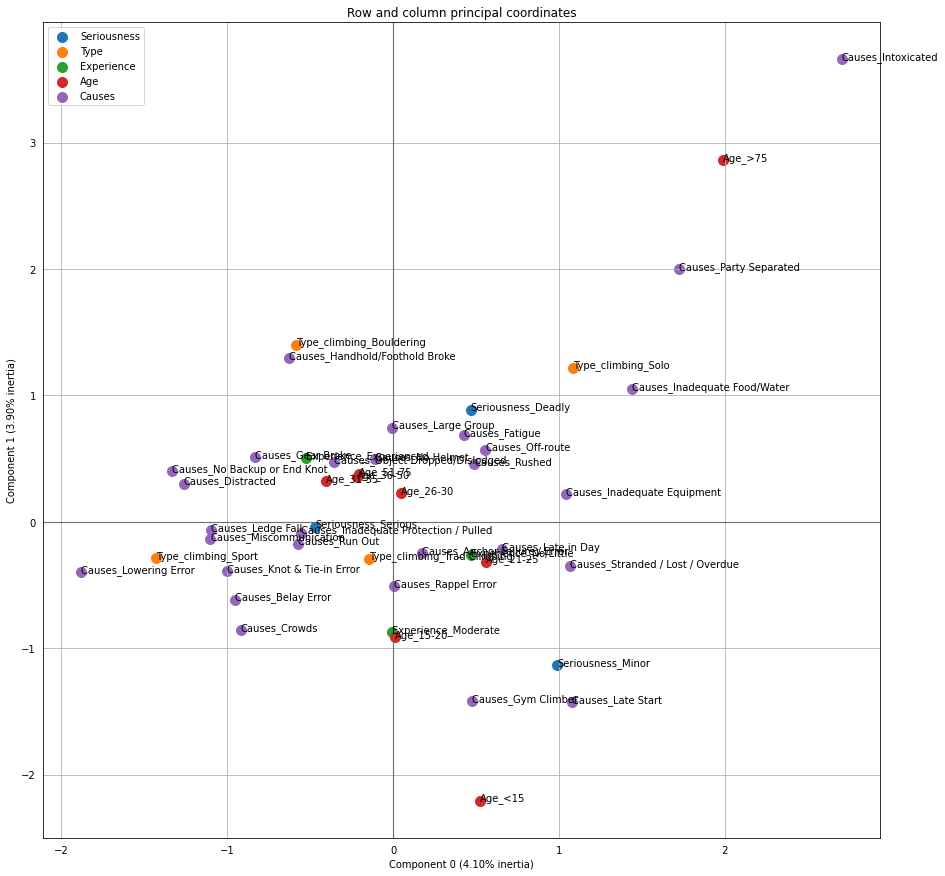

In [390]:
ax = mca.plot_coordinates(
     X=MCA_causes,
     ax=None,
     figsize=(15, 15),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=100,
     show_column_labels=True,
     legend_n_cols=1
     )

In [ ]:
mca.eigenvalues_

[0.5672691337628497, 0.5241901689666112]

In [ ]:
# make scree plot explained variance per dimension (only if you have more than 1 dimension?)

# Main analysis

Going to practice it before recoding all the data.



In [43]:
pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import prince

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/esafak/mca/master/data/burgundies.csv',
                   sep=',', skiprows=1, index_col=0, header=0)
data.head()

X = data.drop('oak_type', axis=1)
j_sup = data.oak_type
i_sup = np.array([0, 1, 0, 1, 0, .5, .5, 1, 0, 1, 0, 0, 1, 0, .5, .5, 1, 0, .5, .5, 0, 1])
ncols = 10

X.shape, j_sup.shape, i_sup.shape

((6, 22), (6,), (22,))

In [46]:
src_index = (['Expert 1'] * 7 + ['Expert 2'] * 9 + ['Expert 3'] * 6)
var_index = (['fruity'] * 2 + ['woody'] * 3 + ['coffee'] * 2 + ['fruity'] * 2
             + ['roasted'] * 2 + ['vanillin'] * 3 + ['woody'] * 2 + ['fruity'] * 2
             + ['butter'] * 2 + ['woody'] * 2)
yn = ['y','n']; rg = ['1', '2', '3']; val_index = yn + rg + yn*3 + rg + yn*4
col_index = pd.MultiIndex.from_arrays([src_index, var_index, val_index], 
                                      names=['source', 'variable', 'value'])

table1 = pd.DataFrame(data=X.values, index=X.index, columns=col_index)
table1.loc['W?'] = i_sup
table1['','Oak Type',''] = j_sup

table1

source   Expert 1                                  Expert 2               ...  \
variable   fruity      woody           coffee        fruity      roasted  ...   
value           y    n     1    2    3      y    n        y    n       y  ...   
Wine                                                                      ...   
W1            1.0  0.0   0.0  0.0  1.0    0.0  1.0      1.0  0.0     0.0  ...   
W2            0.0  1.0   0.0  1.0  0.0    1.0  0.0      0.0  1.0     1.0  ...   
W3            0.0  1.0   1.0  0.0  0.0    1.0  0.0      0.0  1.0     1.0  ...   
W4            0.0  1.0   1.0  0.0  0.0    1.0  0.0      0.0  1.0     1.0  ...   
W5            1.0  0.0   0.0  0.0  1.0    0.0  1.0      1.0  0.0     0.0  ...   
W6            1.0  0.0   0.0  1.0  0.0    0.0  1.0      1.0  0.0     0.0  ...   
W?            0.0  1.0   0.0  1.0  0.0    0.5  0.5      1.0  0.0     1.0  ...   

source                       Expert 3                                       
variable vanillin woody        fruity      butter      woody      Oak Type  
value           3     y    n        y    n      y    n     y    n           
Wine                                                                        
W1            1.0   0.0  1.0      0.0  1.0    0.0  1.0   0.0  1.0      1.0  
W2            0.0   1.0  0.0      0.0  1.0    1.0  0.0   1.0  0.0      2.0  
W3            0.0   1.0  0.0      0.0  1.0    1.0  0.0   1.0  0.0      2.0  
W4            0.0   1.0  0.0      1.0  0.0    1.0  0.0   1.0  0.0      2.0  
W5            1.0   0.0  1.0      1.0  0.0    0.0  1.0   0.0  1.0      1.0  
W6            0.0   0.0  1.0      1.0  0.0    0.0  1.0   0.0  1.0      1.0  
W?            0.0   0.5  0.5      1.0  0.0    0.5  0.5   0.0  1.0      NaN  

[7 rows x 23 columns]

In [51]:
import prince

mca = prince.MCA()

In [52]:
mca = mca.fit(X) # same as calling ca.fs_r(1)
#mca = mca.transform(X) # same as calling ca.fs_r_sup(df_new) for *another* test set.
#print(mca)

ZeroDivisionError: ignored

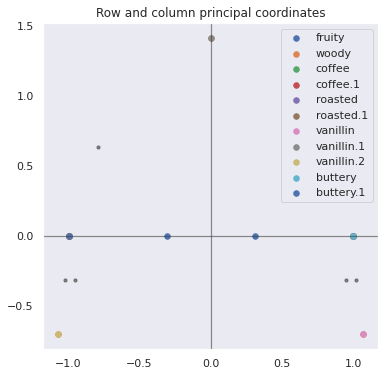

In [53]:
>>> ax = mca.plot_coordinates(
...     X=X,
...     ax=None,
...     figsize=(6, 6),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=False,
...     legend_n_cols=1
... )

## Example from https://stackoverflow.com/questions/48521740/using-mca-package-in-python

In [54]:
X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')
X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']

print(X.head())

mca = prince.MCA()

    Color   Size   Action    Age Inflated
0  YELLOW  SMALL  STRETCH  ADULT        T
1  YELLOW  SMALL  STRETCH  CHILD        F
2  YELLOW  SMALL      DIP  ADULT        F
3  YELLOW  SMALL      DIP  CHILD        F
4  YELLOW  LARGE  STRETCH  ADULT        T


In [55]:
mca = mca.fit(X) # same as calling ca.fs_r(1)
#mca = mca.transform(X) # same as calling ca.fs_r_sup(df_new) for *another* test set.
#print(mca)

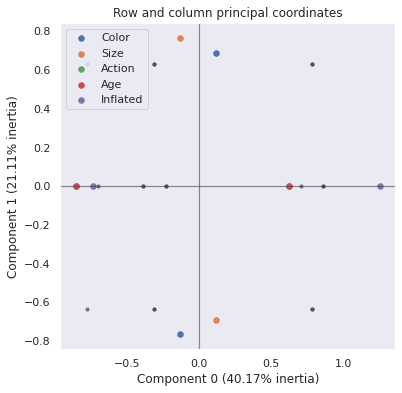

In [56]:
ax = mca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

## Continue preparing my dataset

In [129]:
# type of climbing
melt_type = AAC_accidents.melt(id_vars=['ID'],
                              value_vars=['Trad Climbing', 'Sport', 'Bouldering'],
       var_name = 'Type_climbing')

melt_type = melt_type.loc[(melt_type['value'] != 0)]

melt_type = melt_type.drop('value', 1)

melt_type

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Type_climbing
0,0,Trad Climbing
10,10,Trad Climbing
17,17,Trad Climbing
18,18,Trad Climbing
19,19,Trad Climbing
...,...,...
7904,2108,Bouldering
8182,2386,Bouldering
8259,2463,Bouldering
8533,2737,Bouldering


In [152]:
# join type of climbing to seriousness+experience
df1 = test2
df2 = melt_type.set_index('ID')

test3 = df2.join(df1, how='outer', lsuffix='_left', rsuffix='_right')
test3

,Type_climbing,Experience,Seriousness
ID,,,
0,Trad Climbing,NaN,NaN
1,NaN,Experienced,Serious
2,NaN,Experienced,Minor
7,NaN,Experienced,Serious
10,Trad Climbing,NaN,NaN
...,...,...,...
2883,NaN,No/Little,Deadly
2884,Trad Climbing,NaN,NaN
2886,NaN,No/Little,Deadly


In [153]:
# drop.na
test4 = test3.dropna()
test4

,Type_climbing,Experience,Seriousness
ID,,,
17,Trad Climbing,Experienced,Serious
32,Trad Climbing,Experienced,Serious
64,Trad Climbing,No/Little,Serious
65,Trad Climbing,No/Little,Serious
66,Sport,Unknown,Serious
...,...,...,...
2838,Sport,Experienced,Minor
2843,Trad Climbing,No/Little,Serious
2849,Trad Climbing,No/Little,Serious


### MCA for Type, Experience, Seriousness

In [157]:
mca = prince.MCA()

In [158]:
mca = mca.fit(test4)
mca = mca.transform(test4) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)


             0         1
17    0.293658 -0.249502
32    0.293658 -0.249502
64   -0.123240  0.476425
65   -0.123240  0.476425
66    2.919784  1.387970
...        ...       ...
2838  0.321276  0.233973
2843 -0.123240  0.476425
2849 -0.123240  0.476425
2850  0.293658 -0.249502
2863  0.293658 -0.249502

[614 rows x 2 columns]


In [159]:
mca = prince.MCA()
mca = mca.fit(test4)

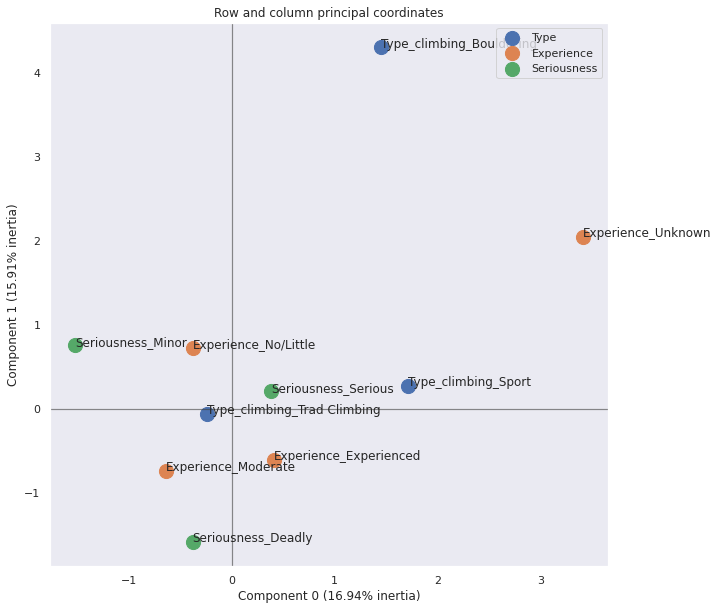

In [165]:
ax = mca.plot_coordinates(
     X=test4,
     ax=None,
     figsize=(10, 10),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=200,
     show_column_labels=True,
     legend_n_cols=1
     )


## MCA for more variables

In [187]:
# no missing values in age? not sure this is showing "0" in df
#AAC_accidents.isna().sum().head(11)

Accident Title      0
Publication Year    0
Text                0
<15                 0
15-20               0
21-25               0
26-30               0
31-35               0
36-50               0
51-75               0
>75                 0
dtype: int64

In [188]:
# age
melt_age = AAC_accidents.melt(id_vars=['ID'],
                              value_vars=['<15', '15-20', '21-25', '26-30', '31-35', '36-50', '51-75', '>75'],
                              var_name = 'Age')

melt_age = melt_age.loc[(melt_age['value'] != 0)]
melt_age = melt_age.drop('value', 1)
melt_age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,ID,Age
0,0,<15
95,95,<15
96,96,<15
170,170,<15
171,171,<15
...,...,...
20214,2826,51-75
20250,2862,51-75
20278,2890,51-75
20874,588,>75


In [189]:
# join type of climbing to seriousness+experience
df1 = test4
df2 = melt_age.set_index('ID')

test5 = df2.join(df1, how='outer', lsuffix='_left', rsuffix='_right')
test5

,Age,Type_climbing,Experience,Seriousness
ID,,,,
0,<15,NaN,NaN,NaN
1,36-50,NaN,NaN,NaN
2,51-75,NaN,NaN,NaN
3,36-50,NaN,NaN,NaN
4,36-50,NaN,NaN,NaN
...,...,...,...,...
2890,51-75,NaN,NaN,NaN
2893,21-25,NaN,NaN,NaN
2894,31-35,NaN,NaN,NaN


In [223]:
# drop.na
test6 = test5.dropna()
test6

,Age,Type_climbing,Experience,Seriousness
ID,,,,
32,31-35,Trad Climbing,Experienced,Serious
64,31-35,Trad Climbing,No/Little,Serious
65,26-30,Trad Climbing,No/Little,Serious
66,26-30,Sport,Unknown,Serious
66,31-35,Sport,Unknown,Serious
...,...,...,...,...
2816,26-30,Trad Climbing,No/Little,Serious
2838,31-35,Sport,Experienced,Minor
2849,26-30,Trad Climbing,No/Little,Serious


In [219]:
# adding accident name such that we know it's the correct ID number
name_df = AAC_accidents['Accident Title']
name_df = pd.DataFrame(data=name_df)
name_df

,Accident Title
ID,
0,Failure of Rappel Setup (Protection Pulled Out...
1,"Failure of Rappel—Failure to Check System, Bri..."
2,"Fall into Crevasse, Climbing Alone, Inadequate..."
3,"Fall into Crevasse, Climbing Unroped, British ..."
4,"Fall Into Crevasse, Unroped, Inadequate Equipm..."
...,...
2769,"Fall on Ice, Inadequate Protection, Poor Posit..."
2770,"Edited Title: Fall on Ice, Inadequate Protecti..."
2771,"Edited title: Snow Blindness ...— Alaska, Moun..."


In [218]:
#name_df = name_df.set_index('ID',inplace=True, drop=True)
#name_df = name_df.reset_index().index
#name_df

RangeIndex(start=0, stop=2898, step=1)

In [220]:
# join to test6
df1 = test6
df2 = name_df

test7 = df2.join(df1, how='outer', lsuffix='_left', rsuffix='_right')
test7

,Accident Title,Age,Type_climbing,Experience,Seriousness
ID,,,,,
0,Failure of Rappel Setup (Protection Pulled Out...,NaN,NaN,NaN,NaN
1,"Failure of Rappel—Failure to Check System, Bri...",NaN,NaN,NaN,NaN
2,"Fall into Crevasse, Climbing Alone, Inadequate...",NaN,NaN,NaN,NaN
3,"Fall into Crevasse, Climbing Unroped, British ...",NaN,NaN,NaN,NaN
4,"Fall Into Crevasse, Unroped, Inadequate Equipm...",NaN,NaN,NaN,NaN
...,...,...,...,...,...
2816,NaN,26-30,Trad Climbing,No/Little,Serious
2838,NaN,31-35,Sport,Experienced,Minor
2849,NaN,26-30,Trad Climbing,No/Little,Serious


In [224]:
# drop.na
test8 = test7.dropna()
test8

,Accident Title,Age,Type_climbing,Experience,Seriousness
ID,,,,,
32,Hyperventilation-Induced Cerebella Ischemia (H...,31-35,Trad Climbing,Experienced,Serious
64,"Faulty Use of Crampons—Jumping Crevasse, Orego...",31-35,Trad Climbing,No/Little,Serious
65,"Inadequate Protection—Rappel Failure, Anchor S...",26-30,Trad Climbing,No/Little,Serious
66,"Inadequate Protection—Rappel Failure, Knot Par...",26-30,Sport,Unknown,Serious
66,"Inadequate Protection—Rappel Failure, Knot Par...",31-35,Sport,Unknown,Serious
...,...,...,...,...,...
2737,"Edited Title: Slide/Fall on Ice, Inadequate P...",21-25,Bouldering,No/Little,Serious
2750,"Fall on Rock, Climbing Unroped, Wisconsin, Dev...",36-50,Trad Climbing,Experienced,Serious
2753,"Faulty Use of Crampons—Glissading, New Hampshi...",51-75,Sport,Experienced,Serious


In [225]:
# write to csv to look at data
test8.to_csv(data_path+'check.csv',sep=',', index=False)

In [ ]:
mca = prince.MCA()

In [ ]:
mca = mca.fit(test4)
mca = mca.transform(test4) # same as calling ca.fs_r_sup(df_new) for *another* test set.
print(mca)


             0         1
17    0.293658 -0.249502
32    0.293658 -0.249502
64   -0.123240  0.476425
65   -0.123240  0.476425
66    2.919784  1.387970
...        ...       ...
2838  0.321276  0.233973
2843 -0.123240  0.476425
2849 -0.123240  0.476425
2850  0.293658 -0.249502
2863  0.293658 -0.249502

[614 rows x 2 columns]


In [ ]:
mca = prince.MCA()
mca = mca.fit(test4)

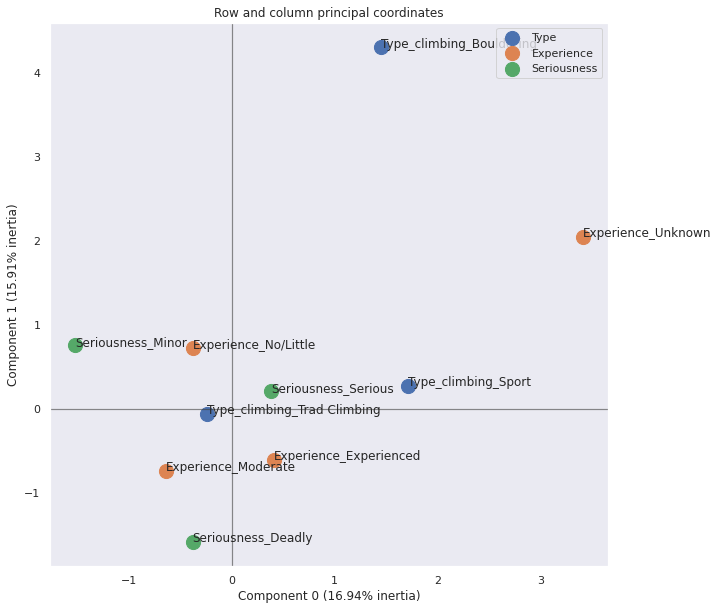

In [ ]:
ax = mca.plot_coordinates(
     X=test4,
     ax=None,
     figsize=(10, 10),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=200,
     show_column_labels=True,
     legend_n_cols=1
     )


# Other package

In [80]:
pip install verticapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import configparser

In [81]:
from verticapy.learn.decomposition import MCA

In [86]:
from verticapy.learn.decomposition import MCA
model = MCA(name = "public.mca_titanic")
display(model)

NoSectionError: ignored

## Plotting geo location - per seriousness

Doesn't look very good because levels cover each other. 

In [244]:
# make long again location x seriousness
merged_df_wide_serious = pd.melt(merged_df_wide, id_vars=['Location', 'longitude', 'latitude'], 
                                 value_vars=['Deadly', 'Minor', 'Serious'], 
                                 var_name = 'Seriousness')

merged_df_wide_serious.sort_values(by = 'Location')

,Location,longitude,latitude,Seriousness,value
0,Alaska,-154.493062,63.588753,Deadly,70
45,Alaska,-154.493062,63.588753,Minor,27
90,Alaska,-154.493062,63.588753,Serious,222
1,Alberta,-77.893700,36.855200,Deadly,59
46,Alberta,-77.893700,36.855200,Minor,26
...,...,...,...,...,...
43,Wyoming,-107.290284,43.075968,Deadly,31
88,Wyoming,-107.290284,43.075968,Minor,14
89,Yukon,-97.763900,35.520100,Minor,0
44,Yukon,-97.763900,35.520100,Deadly,3


In [260]:
import plotly.express as px
fig = px.scatter_geo(merged_df_wide_serious,
                     color="Seriousness", # which column to use to set the color of markers
                     lon = 'longitude',
                     lat = 'latitude',
                     hover_name="Location", # column added to hover information
                     size="value", # size of markers
                     scope = 'usa')

fig.show()

In [128]:
# write to csv to look at data
df.to_csv(data_path+'check.csv',sep=',', index=False)

# Back-up code

### Write to CSV

In [146]:
# write to csv to look at data
merged_df_wide.to_csv(data_path+'merged_df_wide.csv',sep=',', index=False)

In [147]:
df.to_csv(data_path+'df.csv',sep=',', index=False)

NameError: ignored

### Select columns

In [ ]:
ages = titanic["Age"]
age_sex = titanic[["Age", "Sex"]]

## Remove column

In [ ]:
df = df.drop('column_name', 1)

## Reset index

If you get this error: "None of ['ID'] are in the columns"

In [148]:
AAC_accidents['ID'] = AAC_accidents.reset_index().index

# if just setting index to a column in the df
AAC_accidents = AAC_accidents.set_index('ID')

ValueError: ignored

## Remove duplicate column

In [ ]:
test2 = test.loc[:,~test.columns.duplicated()]
test2

In [237]:
# check unique values in column


AttributeError: ignored

# Other stuff

In [ ]:
# melt age
melt_age = AAC_accidents.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'No/Little', 'Moderate',
       'Experienced', 'Unknown', 'Deadly', 'Serious', 'Minor',
       'Head / Brain Injury', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'T op-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location'], 
       ['<15', '15-20', '21-25', '26-30',
       '31-35', '36-50', '51-75', '>75'],
       "Age")

In [ ]:
AAC_accidents

,Search Column\n\n,ID,Accident Title,Publication Year,Text,Tags Applied,COUNT OF TAGS,<15,15-20,21-25,...,April,May,June,July,August,September,October,November,December,Location
0,0,1,Failure of Rappel Setup (Protection Pulled Out...,1990,"Colorado, Rocky Mountain National Park\nOn May...","Serious, Head / Brain Injury, Descent, Roped, ...",8,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0.0,0,Colorado
1,0,2,"Failure of Rappel—Failure to Check System, Bri...",1990,"British Columbia, Squamish, Smoke Bluffs\nOn M...","Experienced, Serious, Descent, Roped, Top-Rope...",7,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0.0,0,British Columbia
2,0,3,"Fall into Crevasse, Climbing Alone, Inadequate...",1990,"Alberta, Rocky Mountains, Crowfoot Mountain\nO...","Experienced, Minor, Unroped , Solo, Climbing A...",9,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0.0,0,Alberta
3,0,4,"Fall into Crevasse, Climbing Unroped, British ...",1990,"British Columbia, Bugaboo Mountains, Bugaboo S...","Minor, Unroped , Solo, Alpine/Mountaineering, ...",5,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0.0,0,British Columbia
4,0,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",1990,"On the afternoon of March 29, 1989, four ski t...","Deadly, Serious, Descent, Unroped , Solo, Non-...",10,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,0,Alberta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,0,958a,"Fall on Ice, Inadequate Protection, Poor Posit...",2000,"Alberta, Banff National Park, Cascade Waterfal...","No/Little, Deadly, Descent, Unroped , Solo, Ic...",9,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0.0,1,Alberta
2766,0,958b,"Edited Title: Fall on Ice, Inadequate Protecti...",2000,"Alberta, Banff National Park, Cascade Waterfal...","Serious, Descent, Roped, Ice Climbing, Avalanc...",8,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0.0,1,Alberta
2767,0,995a,"Edited title: Snow Blindness ...— Alaska, Moun...",2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Descent, Alpine/Mountaineering, Ascent Illness...",4,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0.0,0,Alaska
2768,0,995b,Edited title: Acute Mountain Sickness — Alask...,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Serious, Descent, Alpine/Mountaineering, Ascen...",5,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0.0,0,Alaska


In [ ]:
melt_age.columns

Index(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'No/Little', 'Moderate', 'Experienced',
       'Unknown', 'Deadly', 'Serious', 'Minor', 'Head / Brain Injury',
       'Descent', 'Roped', 'Trad Climbing', 'Sport', 'Top-Rope',
       'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separ

In [ ]:
# melt experience
melt_experience = melt_age.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Deadly', 'Serious', 'Minor',
       'Head / Brain Injury', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'Top-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age'], 
       ['No/Little', 'Moderate',
       'Experienced', 'Unknown'],
       "Experience")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
melt_experience.columns

Index(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Deadly', 'Serious', 'Minor',
       'Head / Brain Injury', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'Top-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climb

In [ ]:
# melt outcome
melt_outcome = melt_experience.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Descent', 'Roped', 'Trad Climbing', 'Sport',
       'Top-Rope', 'Aid & Big Wall Climbing', 'Pendulum', 'Unroped ', 'Solo',
       'Climbing Alone', 'Bouldering', 'Non-climbing', 'Alpine/Mountaineering',
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues', 'Ice Climbing',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience'], 
       ['Deadly', 'Serious', 'Minor',
       'Head / Brain Injury'],
       "Outcome")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
# melt type
melt_type = melt_outcome.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience', 'Outcome'], 
       ['Descent', 'Roped', 'Trad Climbing', 'Sport', 'Top-Rope', 'Aid & Big Wall Climbing', 
        'Unroped ', 'Solo', 'Climbing Alone', 'Bouldering', 'Non-climbing', 
        'Alpine/Mountaineering', 'Ice Climbing'],
       "Type")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
melt_type

,Search Column\n\n,ID,Accident Title,Publication Year,Text,Tags Applied,COUNT OF TAGS,Pendulum,Piton/Ice Screw,Ascent Illness,...,September,October,November,December,Location,Age,Experience,Outcome,Type,value
0,0,1,Failure of Rappel Setup (Protection Pulled Out...,1990,"Colorado, Rocky Mountain National Park\nOn May...","Serious, Head / Brain Injury, Descent, Roped, ...",8,0.0,0.0,0.0,...,0,0,0.0,0,Colorado,<15,No/Little,Deadly,Descent,1.0
1,0,2,"Failure of Rappel—Failure to Check System, Bri...",1990,"British Columbia, Squamish, Smoke Bluffs\nOn M...","Experienced, Serious, Descent, Roped, Top-Rope...",7,0.0,0.0,0.0,...,0,0,0.0,0,British Columbia,<15,No/Little,Deadly,Descent,1.0
2,0,3,"Fall into Crevasse, Climbing Alone, Inadequate...",1990,"Alberta, Rocky Mountains, Crowfoot Mountain\nO...","Experienced, Minor, Unroped , Solo, Climbing A...",9,0.0,0.0,0.0,...,0,0,0.0,0,Alberta,<15,No/Little,Deadly,Descent,0.0
3,0,4,"Fall into Crevasse, Climbing Unroped, British ...",1990,"British Columbia, Bugaboo Mountains, Bugaboo S...","Minor, Unroped , Solo, Alpine/Mountaineering, ...",5,0.0,0.0,0.0,...,1,0,0.0,0,British Columbia,<15,No/Little,Deadly,Descent,0.0
4,0,5,"Fall Into Crevasse, Unroped, Inadequate Equipm...",1990,"On the afternoon of March 29, 1989, four ski t...","Deadly, Serious, Descent, Unroped , Solo, Non-...",10,0.0,0.0,0.0,...,0,0,0.0,0,Alberta,<15,No/Little,Deadly,Descent,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4609275,0,958a,"Fall on Ice, Inadequate Protection, Poor Posit...",2000,"Alberta, Banff National Park, Cascade Waterfal...","No/Little, Deadly, Descent, Unroped , Solo, Ic...",9,0.0,0.0,0.0,...,0,0,0.0,1,Alberta,>75,Unknown,Head / Brain Injury,Ice Climbing,1.0
4609276,0,958b,"Edited Title: Fall on Ice, Inadequate Protecti...",2000,"Alberta, Banff National Park, Cascade Waterfal...","Serious, Descent, Roped, Ice Climbing, Avalanc...",8,0.0,0.0,0.0,...,0,0,0.0,1,Alberta,>75,Unknown,Head / Brain Injury,Ice Climbing,1.0
4609277,0,995a,"Edited title: Snow Blindness ...— Alaska, Moun...",2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Descent, Alpine/Mountaineering, Ascent Illness...",4,0.0,0.0,1.0,...,0,0,0.0,0,Alaska,>75,Unknown,Head / Brain Injury,Ice Climbing,0.0
4609278,0,995b,Edited title: Acute Mountain Sickness — Alask...,2000,"Alaska, Mount McKinley\nOn June 15, both a Sou...","Serious, Descent, Alpine/Mountaineering, Ascen...",5,0.0,0.0,1.0,...,0,0,0.0,0,Alaska,>75,Unknown,Head / Brain Injury,Ice Climbing,0.0


In [ ]:
# melt ice
# subset data
ice = melt_type[['Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position']]

In [ ]:
ice

,Piton/Ice Screw,Ascent Illness,Crampon Issues,Glissading,Ski-related,Poor Position
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
4609275,0.0,0.0,0.0,0.0,0.0,1.0
4609276,0.0,0.0,0.0,0.0,0.0,0.0
4609277,0.0,1.0,0.0,0.0,0.0,0.0
4609278,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
melt_ice = ice.melt(['Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position'],
       "Ice")

ValueError: ignored

In [ ]:
# melt type
melt_month = melt_type.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 
       'Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'Location', 'Age', 'Experience', 'Outcome', 'Type'], 
        ['January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December'],
       "Month")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
melt_AAC.columns

Index(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 'Piton/Ice Screw',
       'Ascent Illness', 'Crampon Issues', 'Glissading', 'Ski-related ',
       'Poor Position', 'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Fail

# not working

In [ ]:
# melt ice
melt_AAC = melt_AAC.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum',
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience', 'Outcome', 
       'Type'], 
       ['Piton/Ice Screw', 'Ascent Illness', 'Crampon Issues',
       'Glissading', 'Ski-related ', 'Poor Position'],
       "Ice")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
# melt nature
melt_nature = melt_type.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience', 'Outcome', 
       "Type"], 
       [ 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall'],
       "Nature")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.


In [ ]:
# melt nature
melt_AAC = melt_AAC.melt(['Search Column\n\n', 'ID', 'Accident Title', 'Publication Year', 'Text',
       'Tags Applied', 'COUNT OF TAGS', 'Pendulum', 
       'Poor Cond/Seasonal Risk', 'Avalanche',
       'Cornice / Snow Bridge Collapse', 'Bergschrund',
       'Crevasse / Moat / Berschrund', 'Icefall / Serac / Ice Avalanche',
       'Exposure', 'Non-Ascent Illness', 'Off-route', 'Rushed', 'Run Out',
       'Crowds', 'Inadequate Food/Water', 'No Helmet', 'Late in Day',
       'Late Start', 'Party Separated', 'Ledge Fall', 'Gym / Artificial',
       'Gym Climber', 'Fatigue', 'Large Group', 'Distracted',
       'Object Dropped/Dislodged', 'Handhold/Foothold Broke',
       'Knot & Tie-in Error', 'No Backup or End Knot', 'Gear Broke',
       'Intoxicated', 'Inadequate Equipment', 'Inadequate Protection / Pulled',
       'Anchor Failure / Error', 'Stranded / Lost / Overdue', 'Belay Error',
       'Rappel Error', 'Lowering Error', 'Miscommunication', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'Location', 'Age', 'Experience', 'Outcome', 
       "Type", "Ice"], 
       [ 'Visibility', 'Severe Weather',
       'Wildlife', 'Natural Rockfall'],
       "Nature")

In [ ]:
full_data_summary = AAC_accidents.describe()
full_data_summary

,Search Column\n\n,Publication Year,COUNT OF TAGS,<15,15-20,21-25,26-30,31-35,36-50,51-75,...,Inadequate Equipment,Inadequate Protection / Pulled,Anchor Failure / Error,Stranded / Lost / Overdue,Belay Error,Rappel Error,Lowering Error,Miscommunication,January,November
count,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,...,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
mean,0.050181,2003.824549,6.089170,0.006137,0.099278,0.210469,0.221300,0.158845,0.278339,0.099639,...,0.088448,0.218773,0.049097,0.117329,0.045848,0.092058,0.028520,0.025271,0.035740,0.033574
std,0.221640,39.070894,2.144557,0.082608,0.593603,0.516362,0.525047,0.417264,0.585857,0.349637,...,0.283996,0.413489,0.216111,0.321869,0.209194,0.289160,0.166483,0.156975,0.185675,0.180162
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1997.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2004.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2013.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2019.000000,17.000000,2.000000,25.000000,4.000000,5.000000,3.000000,6.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
